#### **[데이터마이닝] Assignment 4: CLUSTER ANALYSIS**
**<font color='grey'> 2019 55718 | Melia Putri Handayani (멜리아 푸트리 한다야니)**

**라이브러리 'sklearn'을 이용하여 (Using the library 'Sklearn')**

> iris 데이터셋을 대상으로 군집 분석 (k-평균, 각 종 linkage, DBSCAN)을 행하시오.
*(Perform cluster analysis (k-average, linkage, DBSCAN) on iris datasets)*

1. 군집 분석시 엘보우 방법, 실루엣 그림을 사용하시오
> (Use the Elbow method and silhouette plot for cluster analysis)
2. 각 종 linkage 각 각에 대하여 덴드로그램을 그리고 특징을 설명하시오
> (Draw a dendrogram for each linkage and describe the features)

###**Data Preparation**

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster

%matplotlib inline

In [10]:
url="https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df=pd.read_csv(url)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


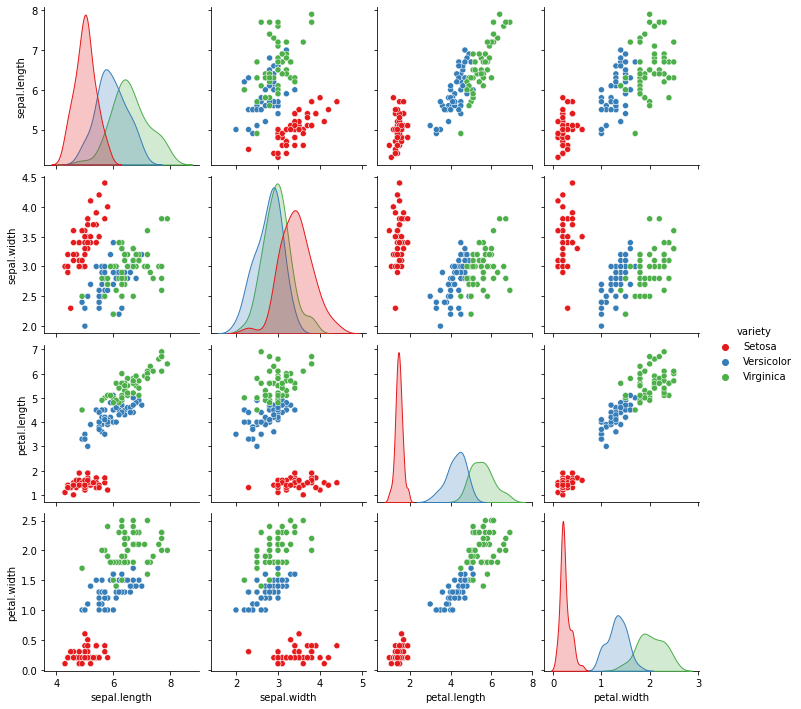

In [12]:
plt.rcParams['figure.facecolor']='white'
sns.pairplot(df,hue='variety',palette='Set1')

####**K-Means**

In [38]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [39]:
k_means=cluster.KMeans(n_clusters=3)

In [40]:
k_means.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
print(k_means.labels_[::10])

[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]


In [42]:
print(y[::10])

['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Virginica'
 'Virginica' 'Virginica' 'Virginica']


#####**Elbow Method**

In [45]:
#Finding the optimum number of clusters for k-means classification
wcss=[]

for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

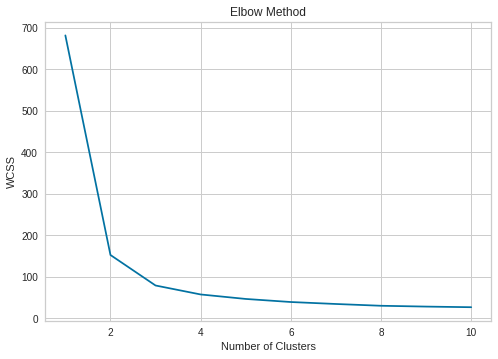

In [46]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans=cluster.KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

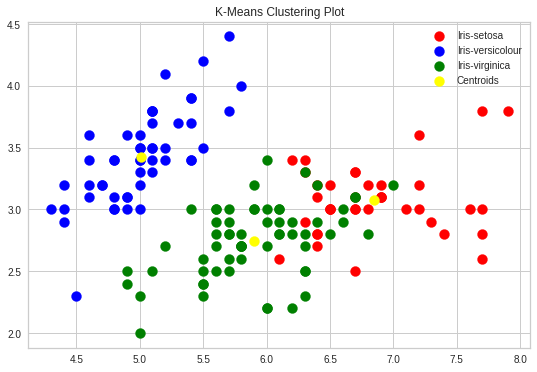

In [70]:
#Visualising the clusters
plt.figure(figsize=(9,6),facecolor='w')
plt.title("K-Means Clustering Plot")
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')

plt.legend()

#####**Silhouette Plot**

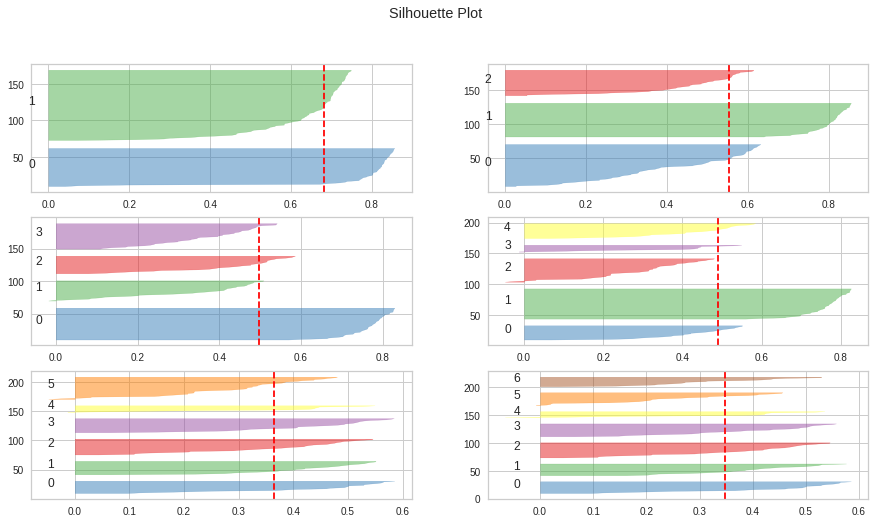

In [50]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")

iris=datasets.load_iris()
X=iris.data
y=iris.target
  
fig,ax=plt.subplots(3,2,figsize=(15,8))
plt.suptitle("Silhouette Plot")
for i in [2,3,4,5,6,7]:
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=100,random_state=42)
    q,mod=divmod(i,2)
    visualizer=SilhouetteVisualizer(km,colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(X)  

####**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

In [77]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [78]:
#For convenience we can use Iris Dataset from SK Learn
iris=datasets.load_iris()

In [79]:
#Compute the DBSCAN
db=DBSCAN(eps=0.3,min_samples=10).fit(iris['data'])
core=np.zeros_like(db.labels_,dtype=bool)
core[db.core_sample_indices_]=True
labels=db.labels_

In [80]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_=len(set(labels))-(1 if -1 in labels else 0)

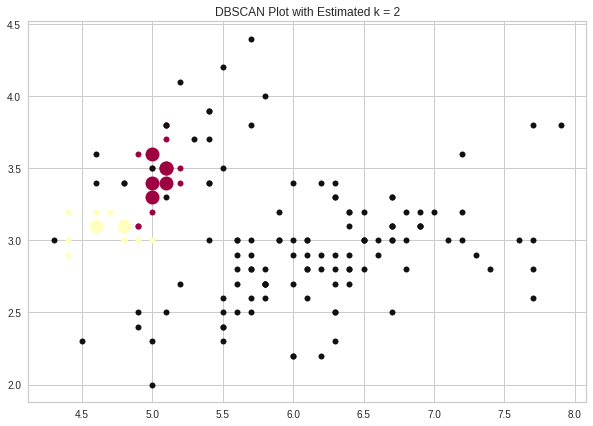

In [86]:
setlabels=set(labels)
plt.figure(figsize=(10,7),facecolor='w')
colors=plt.cm.Spectral(np.linspace(0,1,len(setlabels)))
for k, col in zip(setlabels,colors):
    if k==-1:
        col='k'

    class_mask=(labels==k)

    xy=X[class_mask & core]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=col,
             markeredgecolor='k',markersize=14)

    xy=X[class_mask & ~core]
    plt.plot(xy[:,0],xy[:,1],'o',markerfacecolor=col,
             markeredgecolor='k',markersize=6)

plt.title('DBSCAN Plot with Estimated k = %d'% n_clusters_)
plt.show()

####**Linkage Tree - Hierarchical Clustering**

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [60]:
df_lw=df.iloc[:,0:4]
df_lw

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


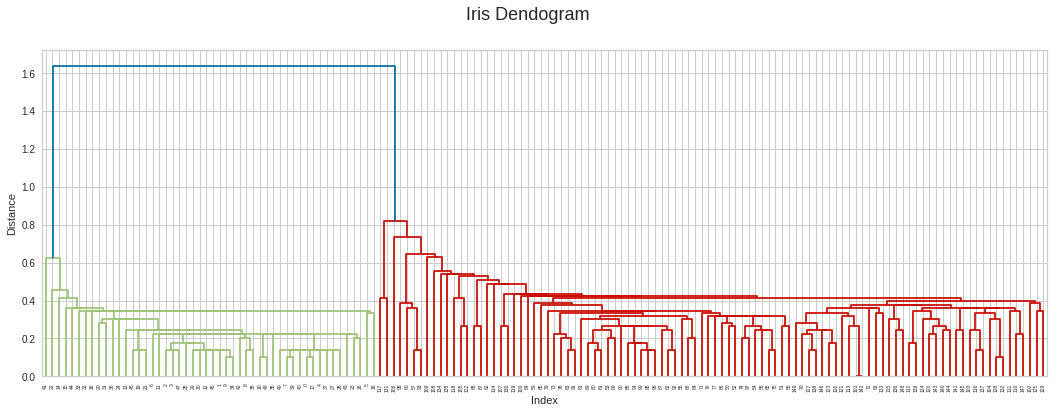

In [61]:
dist_sin=linkage(df_lw,method="single")
plt.figure(figsize=(18,6),facecolor='w')
dendrogram(dist_sin,leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Iris Dendogram",fontsize=18)
plt.show()